# Calculate Precipitation-based Agricultural Drought Indices with Python

Drought is an insidious natural hazard that results from a deficiency of precipitation from expected or “normal” that, when extended over a season or longer period of time, is insufficient to meet the demands of human activities and the environment. Drought has had a significant impact on agriculture. The increasing frequency and magnitude of droughts in recent decades and the mounting losses from extended droughts in the agricultural sector emphasize the need for assigning an urgent priority to addressing the issue of agricultural droughts.

There are quite a few of drought indices currently used around the world for agricultural drought(see Dalezios et al., 2017). These indices could be grouped in seven distinct categories: 
- ***precipitation-based indices***; 
- temperature-based indices; 
- precipitation- and temperature-based indices; 
- indices based on precipitation, temperature, and soil moisture/soil characteristics; 
- indices based on precipitation, temperature, relative humidity, solar radiation, wind speed, and soil moisture/soil characteristics; 
- indices based on remote sensing; 
- indices based on a composite approach (multiple indicators/indices).

## 1. Precipitation-based indices

***Precipitation-based indices*** are generally considered as the simplest indices because they are calculated solely based on long-term rainfall records that are often available.

The mostly used precipitation-based indices consist of
- Decile Index (DI)
- Hutchinson Drought Severity Index (HDSI) 
- Percen of Normal Index (PNI) 
- Z-Score Index (ZSI)
- China-Z Index (CZI)
- Modified China-Z Index (MCZI)
- Rainfall Anomaly Index (RAI) 
- Effective Drought Index (EDI)
- Standardized Precipitation Index (SPI).

## 2. Python and pandas

Most of these indices are calculated from a long-term monthly time series of precipitation records. Using [pandas](https://pandas.pydata.org/), it is quite easy to work with with dates, times, and time-indexed data (inclusively precipitation data). 

pandas is an open source library for Python, which was created to enable Python to easily manipulate and perform powerful statistical and mathematical analyses on tabular and multidimensional datasets. Pandas is one of the most popular Python library for data wrangling, whose dataframes offer many ways to update and select data:

- update the values in specific columns using functions;
- create new dataframes from selections and from grouping data;
- create new dataframes by combining existing dataframes;
- export data to many formats.

## 3. Key calculation tricks

The preceding precipitation-based indices could be calculated directly on the pandas's dataframe except ***SPI***. Calculation of the SPI requires to fit a long-term record to a probability distribution, which is then transformed into a normal distribution.

### 3.1 Read data 
df = pd.read_csv()

### 3.2 Rank data
df.rank()

Furthermore, with ranks, it is easy to calculate probabilities of each value as 

df['probs'] = (df.rank()-1.0)/(len(df)-1.0)*100.0

### 3.3 Calculate mean or median
df.mean() or df.median()

### 3.4 Calculate percentiles
df.quantile([0.2, 0.4, 0.6, 0.8])

This function could be used to get key thresholds.

### 3.5 Calculate standard deviation
df.std()

### 3.6 Transform temporal scales
df.rolling()

e.g., monthly data could be transformed into e.g., 3-, 6-, 9-, 12-monthly scales.

### 3.7 Rolling apply custom function
df.rolling(12).apply(cfunc, raw=False)

### 3.8 Apply cumulative sum
df.cumsum()

### 3.9 Save data
df.to_csv()

## 4. Demo

The example to calculate Hutchinson Drought Severity Index (HDSI) can be found [HDI](https://www.linkedin.com/pulse/calculate-hutchinson-drought-severity-index-hdsi-python-chonghua-yin/).

### 4.1 Calculate Percent of Normal Index (PNI)

This approach of PNI (McKee et al. 1993) has value in its simplicity and transparency, especially because all sectors tend to “know what it means,” and it is noteworthy that this approach has strong support in countries such as Indonesia. A downside of this approach is that it does not necessarily detect the extremes in drought conditions, and this can be a problem in very arid areas.

This approach also requires a good knowledge of local conditions to make it useful. Hayes (2000 and 2006) suggests analyses using percent of normal are most effective when used for a single region or a single season. Conversely, percent of normal may be misunderstood and provide different indications of conditions, depending on the location and season.

It is calculated by simply dividing actual precipitation by normal (30-year mean) precipitation and multiplying the result by 100%. This approach can be calculated for a variety of time scales, which generally range from a single month to a group of months representing a particular season, up to a year.

(0, 500)

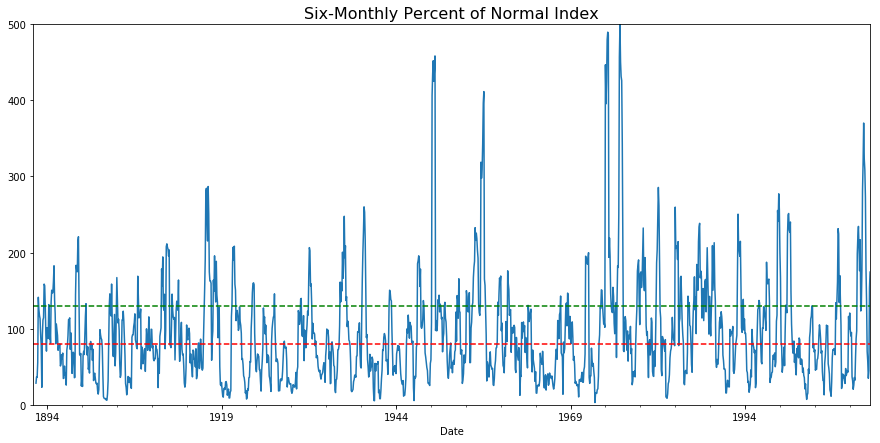

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('data/prcphq.046037.month.txt', sep=r"\s+",                    
                   skiprows=1, usecols=[1, 2], 
                   parse_dates=True,
                   index_col = 0,
                   names=['Date', 'Rain'])

data['Rain_6'] = data['Rain'].rolling(6).sum()
df_6mon = data[['Rain_6']].dropna()

df_6mon['PNI'] = np.nan

for imon in np.arange(1, 13):
    sinds = df_6mon.index.month==imon    
    x = df_6mon[sinds]       
    y = x/x['1981':'2010'].mean()*100.0    
    df_6mon.loc[sinds, 'PNI'] = y.values[:,0]   

data['PNI'] = df_6mon['PNI']
del df_6mon

ax = data['PNI'].plot(figsize=(15, 7), )
ax.axhline(130,  linestyle='--', color='g')
ax.axhline(80, linestyle='--', color='r')
ax.set_title('Six-Monthly Percent of Normal Index', fontsize=16)
ax.set_xlim(data.index.min(), data.index.max())
ax.set_ylim(0, 500)

### 4.1 Other indices

The calculation of SPI is a little bit different from other 8 indices. An example can be found at [SPI](https://www.linkedin.com/pulse/standardized-precipitation-index-spi-chonghua-yin/).

<div class="row">
  <div class="column">
    <img src="img\DEMO.png" >
  </div>
</div>

## Summary

It should, however, be noted, that even though the paucity of rain is a main cause of agricultural drought, rainfall data alone may often be insufficient to assess the effect of drought on agricultural productivity. Nevertheless, use of rainfall has considerable value in providing effective summaries of droughts, and, provided the purpose is clearly and precisely defined in terms of activity, location, and timing, rainfall data can greatly assist activities such as drought policy decisions (Heim 2000, 2002; White and Walcott 2009; Dalezios et al., 2017).

## References

Dalezios, Nicolas & Gobin, Anne & Tarquis, Ana M. & Eslamian, Saeid. (2017). Agricultural Drought Indices: Combining Crop, Climate, and Soil Factors. Handbook of Drought and Water Scarcity: Principles of Drought and Water Scarcity.

Heim, R.R. Jr. 2000. Drought indices: A review. Pages 159-167 in Drought: A Global Assessment (D.A. Wilhite, ed.). Routledge, London. 

Heim, R.R. Jr. 2002. A review of twentieth-century drought indices used in the United States. Bulletin American Meteorological Society 83:1149-1165.

White, D.H. and J.J. Walcott. 2009. The role of seasonal indices in monitoring and assessing agricultural and other droughts: A review. Crop and Pasture Science 60:599-616.

http://www.droughtmanagement.info/